In [205]:
import numpy as np
from typing import Union, Final
import matplotlib.pyplot as plt

In [240]:
#Defining constants
MC_samples:Final[int] = 10**3
q_low:Final[float] = 0.1
q_high:Final[float] = 30.0
q_count:Final[int] = 100
domain = {
    'X_min' : -1,
    'X_max' : 1,
    'Y_min' : -1,
    'Y_max' : 1,
    'Z_min' : -1,
    'Z_max' : 1,
}
Number_of_points_inside_domain = 1000

To get $N$ number of random points which lie inside the sphere, we need to sample more than $N$ points in the given bound. Since the given bound is a cube

$$ {V_s \over V_c} = {{4/3 \pi r^3} \over (2r)^3} = {{4\pi}\over{24}} = {{\pi}\over{6}} \approx 0.523 $$
Here, $r$ is the radius of the sphere, and since we are creating bounds for the sphere, the lenght of the side of the cube will be $2r$. 

So, the number of samples to be calculated is ${1\over {\pi / 6}}N \approx 1.912N$.

In [248]:
Number_of_samples = int(Number_of_points_inside_domain*(6/np.pi))

Random_points = {
    'x' : np.random.uniform(domain['X_min'],domain['X_max'],size=Number_of_samples),
    'y' : np.random.uniform(domain['Y_min'],domain['Y_max'],size=Number_of_samples),
    'z' : np.random.uniform(domain['Z_min'],domain['Z_max'],size=Number_of_samples),
}

Filter = (Random_points['x']**2 + Random_points['y']**2 + Random_points['z']**2) <= 1

Random_points = np.c_[Random_points['x'],Random_points['y'],Random_points['z']]
Random_points = Random_points[Filter]

In [249]:
Qs = np.geomspace(q_low,q_high, num = q_count)

$$ P(q) \approx {2 \over {N(N-1)}} \sum_{i = 0}^{N - 1} \sum_{j = i + 1}^{N} {{sinqR_{i,j}}\over{qR_{i,j}}}$$

In [243]:
def P_q(q):
    P = 0
    for i in range(len(Random_points)-1):
        for j in range(i+1,len(Random_points)):
            distance = np.linalg.norm(Random_points[j]-Random_points[i])
            qr = q*distance
            p_q = np.sin(qr)/(qr)
            P = (P + p_q)/2
    return P

$$ P_{exact}(q) = [{{3 \over {(qR)^3}} (sin(qR) - qRcos(qR))}]^2 $$

In [244]:
def P_exact(q,radius = 1):
    return ((3/((q*radius)**3))*(np.sin(q*radius) - q*radius*np.cos(q*radius)))**2

In [245]:
Values_of_P = [P_q(q) for q in Qs]

In [246]:
Exact_P = [P_exact(q) for q in Qs]

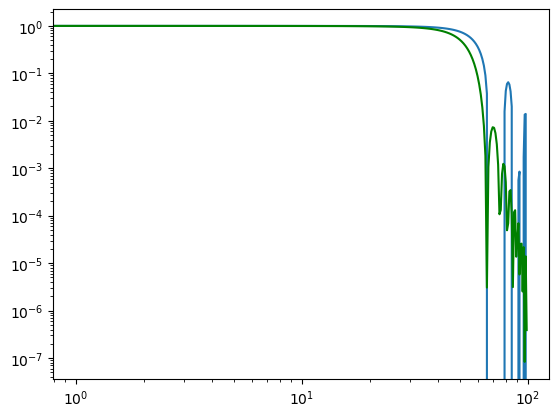

In [247]:
plt.xscale("log")
plt.yscale("log")
plt.plot(Values_of_P)
plt.plot(Exact_P, color='green')